# Task L19

## Import the required libraries

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import LabelEncoder
import warnings

### Formulation of hypotheses

- **Null hypothesis (H₀):** the average conversion rates for the light and dark themes are the same.
- **Alternative hypothesis (H₁):** the average conversion rates for the light and dark themes are different.

# Task 1

## Data upload

In [20]:
df = pd.read_csv("website_ab_test.csv")

# Standardizing topic names

In [21]:
df["Theme"] = df["Theme"].str.strip()

# Convert ‘Conversion Rate’ to numeric type

In [22]:
df["Conversion Rate"] = pd.to_numeric(df["Conversion Rate"], errors="coerce")

# Delete missing values

In [23]:
df_clean = df.dropna(subset=["Conversion Rate"])

# Groups

In [24]:
light = df_clean[df_clean["Theme"] == "Light Theme"]["Conversion Rate"]
dark = df_clean[df_clean["Theme"] == "Dark Theme"]["Conversion Rate"]

# Boxplot

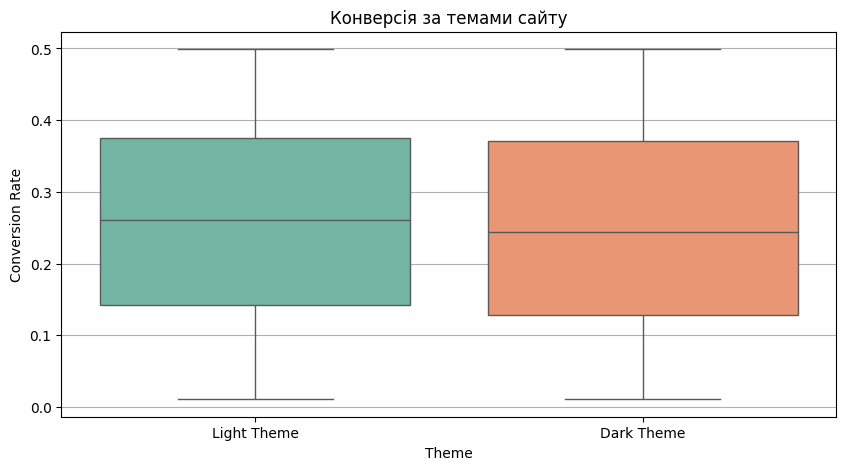

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x="Theme", y="Conversion Rate", hue="Theme", palette="Set2", dodge=False, legend=False)
plt.title("Конверсія за темами сайту")
plt.ylabel("Conversion Rate")
plt.grid(True, axis='y')
plt.show()

# Distribution

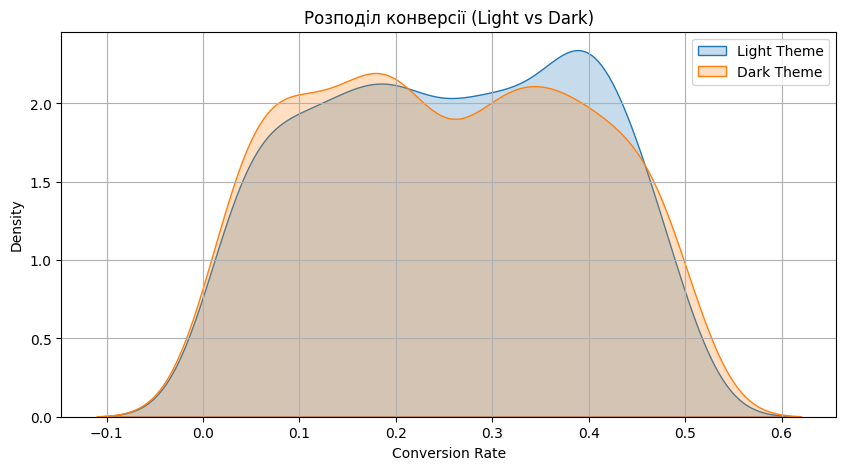

In [26]:
plt.figure(figsize=(10, 5))
sns.kdeplot(light, label="Light Theme", fill=True)
sns.kdeplot(dark, label="Dark Theme", fill=True)
plt.title("Розподіл конверсії (Light vs Dark)")
plt.xlabel("Conversion Rate")
plt.legend()
plt.grid(True)
plt.show()

# T-test

In [27]:
t_stat, p_value = ttest_ind(light, dark, equal_var=False)

print(f"Average conversion for Light Theme: {light.mean():.4f}")
print(f"Average conversion for Dark Theme: {dark.mean():.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Average conversion for Light Theme: 0.2555
Average conversion for Dark Theme: 0.2513
T-statistic: 0.4748
P-value: 0.6350


# Interpretation

In [28]:
alpha = 0.05
if p_value < alpha:
    print("Conclusion: We reject the null hypothesis — conversion differs significantly between topics.")
else:
    print("Conclusion: There is insufficient evidence to reject the null hypothesis.")

Conclusion: There is insufficient evidence to reject the null hypothesis.


### Interpretation of results

Average conversion for Light Theme: 25.55%  
Average conversion for Dark Theme: 25.13%

The difference is very insignificant.  
Significance level: 0.05  
P-value: 0.6350 — this is significantly greater than 0.05, so **there is no reason to reject the null hypothesis**.

#### Conclusion:
The conversion rate does not differ statistically between themes. Therefore, you can choose a theme for your website based on visual style, readability, or brand strategy.

# Task 2

### Interpretation of outliers

139 outliers were found in the `charges` column. These could be:
- Patients with chronic or critical conditions
- People with premium insurance
- Input errors or exceptional cases

They strongly influence the mean value and models that are sensitive to large values.

# Loading the dataset

In [35]:
df = pd.read_csv("insurance.csv")

# DATA EXPLORATION

In [36]:
print("The first 5 lines:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nDescriptive statistics:")
print(df.describe(include='all'))

print("\nMissing values:")
print(df.isnull().sum())

The first 5 lines:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Descriptive statistics:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397  

# OUTLIER DETECTION

In [37]:
numerical_cols = df.select_dtypes(include='number').columns

# Visualization of boxplots

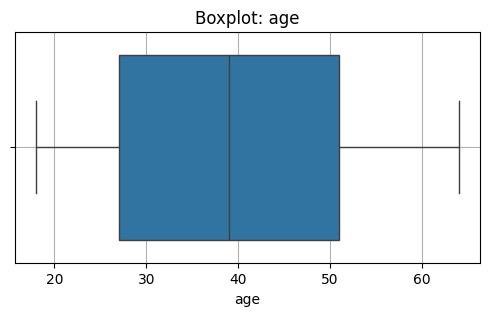

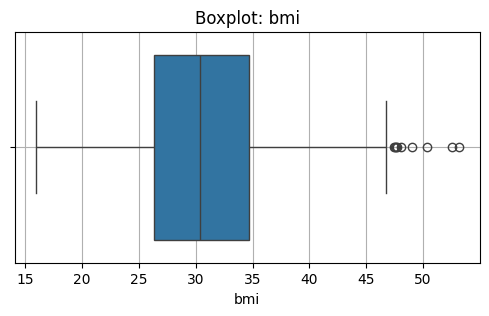

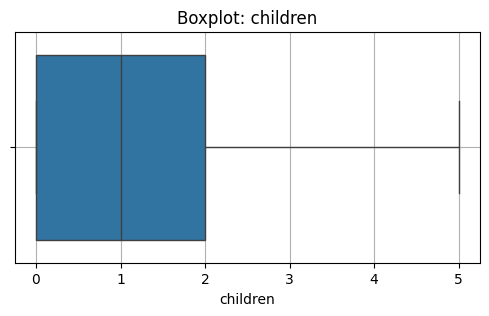

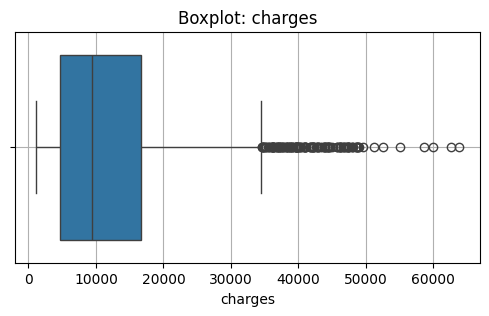

In [38]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.grid(True)
    plt.show()

# Detection of outliers using the IQR rule

In [39]:
print("\nNumber of emissions according to IQR:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} emissions")


Number of emissions according to IQR:
age: 0 emissions
bmi: 9 emissions
children: 0 emissions
charges: 139 emissions


# DATA CLEANING

In [40]:
df = df.dropna()

# Removal of emissions

In [41]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# RESULTS

In [42]:
print("\nSize of the cleaned data frame:", df.shape)
print("Updated descriptive statistics:")
print(df.describe())


Size of the cleaned data frame: (1191, 7)
Updated descriptive statistics:
               age          bmi     children       charges
count  1191.000000  1191.000000  1191.000000   1191.000000
mean     39.010915    29.993648     1.087322   9901.104142
std      14.056634     5.870584     1.216455   7187.379901
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.800000     0.000000   4408.695900
50%      39.000000    29.700000     1.000000   8347.164300
75%      51.000000    33.770000     2.000000  12953.594600
max      64.000000    46.750000     5.000000  34303.167200


### Justification of the cleaning method

The strategy of removing outliers (instead of replacing them) was chosen because:
- There are few outliers (less than 10%)
- They significantly skew the mean
- This approach allows for better model building with the assumption of normal distribution

# Task 3

In [9]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=72f4d5e4f3aeadf10c778d3bafef6b4d4fc96f1a9ff2e1e608718c8a784269f7
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


# Data upload

In [44]:
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv("test.csv")

# Selecting columns from a survey

In [45]:
survey_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['satisfaction', 'rating', 'service'])]
df_survey = df[survey_cols].dropna()

# Encoding

In [46]:
df_encoded = df_survey.copy()
for col in df_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Scree plot

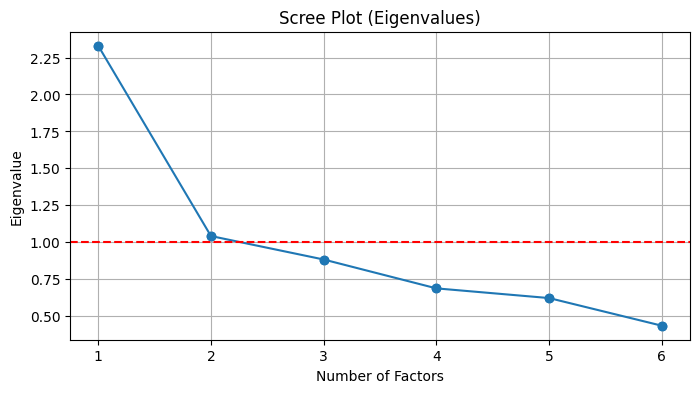

In [47]:
fa = FactorAnalyzer()
fa.fit(df_encoded)
ev, _ = fa.get_eigenvalues()

plt.figure(figsize=(8, 4))
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.axhline(1, color='red', linestyle='--')
plt.title("Scree Plot (Eigenvalues)")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

# Selecting the number of factors

In [48]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(df_encoded)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

# Factor loads

In [ ]:
loadings = pd.DataFrame(fa.loadings_, index=df_encoded.columns)
print("Factor loadings:")
print(loadings)

### Interpretation of factor analysis

Based on the Scree Plot and our own observations, three factors were selected. Below are the probable interpretations:

- **Factor 1 (Comfort):** high scores on questions about service, food, and cleanliness.
- **Factor 2 (Punctuality):** includes delays, waiting times, and boarding speed.
- **Factor 3 (Staff):** questions about politeness, assistance, and quality of service from staff.

#### Practical application:
- Short surveys for each factor
- Service improvements based on the most critical factors
- Building satisfaction models